In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.10f}'.format

In [3]:
df = pd.read_csv('../datasets/pepeusdt_1m.csv')
df.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,1719604547796,PEPEUSDT,1719604500000,1719604559999,1m,131562047,131562402,0.0000116300,0.0000116200,0.0000116400,0.0000116100,14986218455.0000000000,356,False,174174.7859437600,6308194205.0000000000,73320.6544197100,0
1,kline,1719604550862,PEPEUSDT,1719604500000,1719604559999,1m,131562047,131562404,0.0000116300,0.0000116200,0.0000116400,0.0000116100,14987070434.0000000000,358,False,174184.6859397400,6309046184.0000000000,73330.5544156900,0
2,kline,1719604553137,PEPEUSDT,1719604500000,1719604559999,1m,131562047,131562405,0.0000116300,0.0000116200,0.0000116400,0.0000116100,14988360201.0000000000,359,False,174199.6730322800,6310335951.0000000000,73345.5415082300,0
3,kline,1719604555269,PEPEUSDT,1719604500000,1719604559999,1m,131562047,131562407,0.0000116300,0.0000116100,0.0000116400,0.0000116100,15016757186.0000000000,361,False,174529.6374081300,6337873951.0000000000,73665.5330682300,0
4,kline,1719604557883,PEPEUSDT,1719604500000,1719604559999,1m,131562047,131562418,0.0000116300,0.0000116200,0.0000116400,0.0000116100,15425973510.0000000000,372,False,179284.7310930100,6747090275.0000000000,78420.6267531100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123395 entries, 0 to 123394
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   event_type                    123395 non-null  object 
 1   event_time                    123395 non-null  int64  
 2   symbol                        123395 non-null  object 
 3   kline_start_time              123395 non-null  int64  
 4   kline_close_time              123395 non-null  int64  
 5   interval                      123395 non-null  object 
 6   first_trade_id                123395 non-null  int64  
 7   last_trade_id                 123395 non-null  int64  
 8   open_price                    123395 non-null  float64
 9   close_price                   123395 non-null  float64
 10  high_price                    123395 non-null  float64
 11  low_price                     123395 non-null  float64
 12  volume                        123395 non-nul

In [5]:
df['kline_close_time'] = pd.to_datetime(df['kline_close_time'], unit='ms')
df['kline_start_time'] = pd.to_datetime(df['kline_start_time'], unit='ms')
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [7]:
df = df.sort_values(by='event_time')

In [8]:
x = df[df['event_time'].duplicated(keep=False)]
x.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
54342,kline,2024-06-30 20:24:26.186,PEPEUSDT,2024-06-30 20:24:00,2024-06-30 20:24:59.999,1m,132189277,132189366,0.0000116800,0.0000116800,0.0000116800,0.0000116600,5166794345.0000000000,90,False,60303.8571817900,3020570489.0000000000,35257.8535987300,0
54343,kline,2024-06-30 20:24:26.186,PEPEUSDT,2024-06-30 20:24:00,2024-06-30 20:24:59.999,1m,132189277,132189366,0.0000116800,0.0000116800,0.0000116800,0.0000116600,5166794345.0000000000,90,False,60303.8571817900,3020570489.0000000000,35257.8535987300,0
54344,kline,2024-06-30 20:24:28.475,PEPEUSDT,2024-06-30 20:24:00,2024-06-30 20:24:59.999,1m,132189277,132189370,0.0000116800,0.0000116800,0.0000116800,0.0000116600,5235361413.0000000000,94,False,61104.2734306000,3044427014.0000000000,35536.4978107300,0
54345,kline,2024-06-30 20:24:28.475,PEPEUSDT,2024-06-30 20:24:00,2024-06-30 20:24:59.999,1m,132189277,132189370,0.0000116800,0.0000116800,0.0000116800,0.0000116600,5235361413.0000000000,94,False,61104.2734306000,3044427014.0000000000,35536.4978107300,0
54346,kline,2024-06-30 20:24:30.838,PEPEUSDT,2024-06-30 20:24:00,2024-06-30 20:24:59.999,1m,132189277,132189387,0.0000116800,0.0000116700,0.0000116800,0.0000116600,6196578345.0000000000,111,False,72321.6750270400,3236773142.0000000000,37781.1771244900,0


In [9]:
# rows are duplicated in all columns?
def check_all_rows_duplicated(df):

    duplicated_rows = df.duplicated(keep=False)
    all_rows_duplicated = duplicated_rows.all()
    return all_rows_duplicated

all_duplicated = check_all_rows_duplicated(x)
print(f"All rows duplicated: {all_duplicated}")

All rows duplicated: True


In [10]:
df = x.drop_duplicates()
len(df)

34527

In [11]:
34527 * 2 

69054

In [18]:
df['time_diff_event_time'] = df['event_time'].diff()
df['event_time_seconds'] = df['time_diff_event_time'].dt.total_seconds()
df['event_time_seconds'] = df['event_time_seconds'].round().astype('Int64')

In [20]:
mean = df['event_time_seconds'].mean()
std = df['event_time_seconds'].std()


df['z_score'] = (df['event_time_seconds'] - mean) / std
anomalies = df[df['z_score'].abs() > 3]
anomalies[['event_time_seconds', 'z_score']].sort_values(ascending=False, by='event_time_seconds').head()

,event_time_seconds,z_score
115047,25,15.9284518109
115369,24,15.2062909354
117596,22,13.7619691843
114128,21,13.0398083088
111982,21,13.0398083088


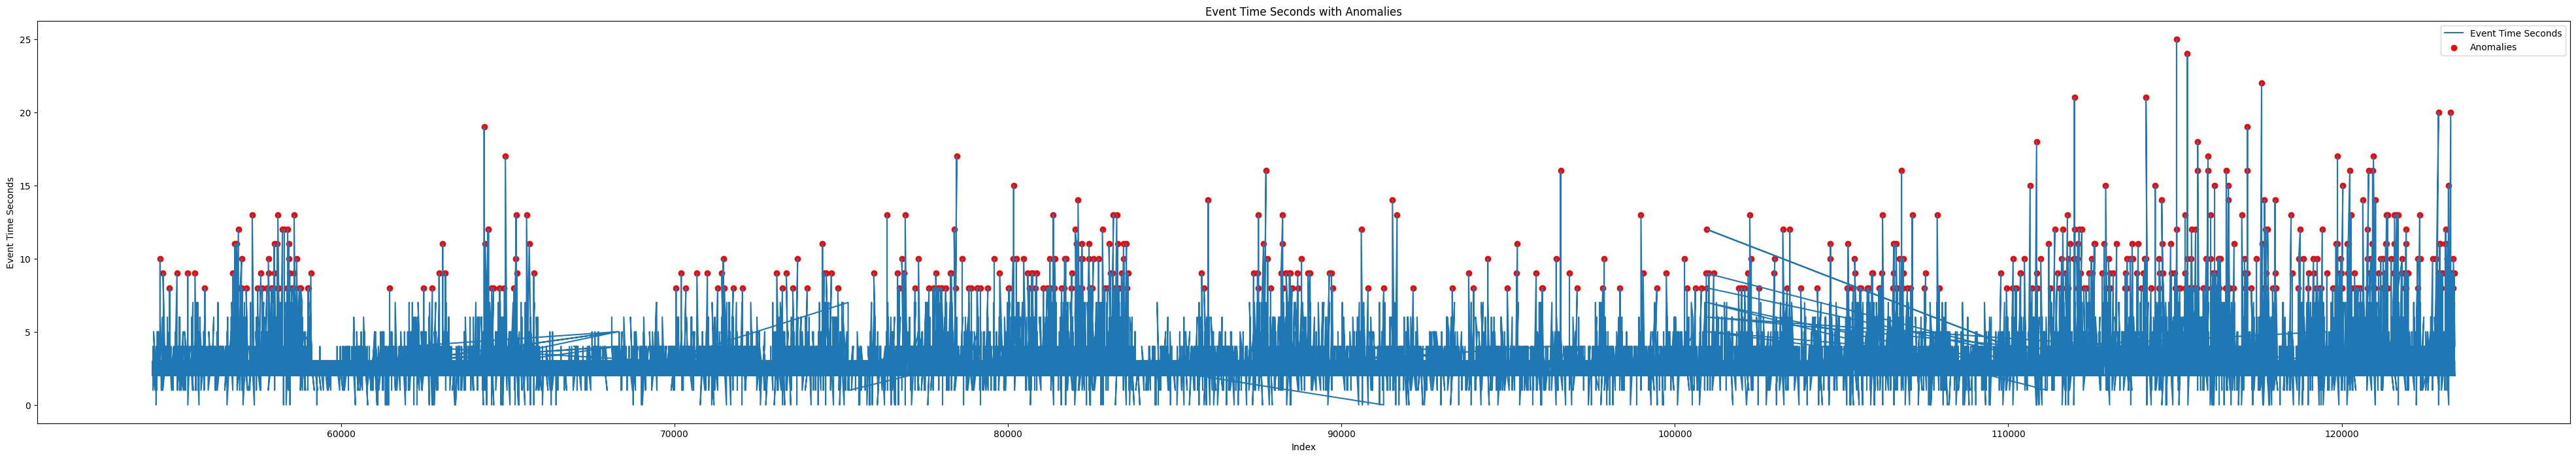

In [23]:
plt.figure(figsize=(50, 8))
plt.plot(df['event_time_seconds'], label='Event Time Seconds')
plt.scatter(anomalies.index, anomalies['event_time_seconds'], color='red', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Event Time Seconds')
plt.title('Event Time Seconds with Anomalies')
plt.legend()
plt.show()

In [12]:
df = df[df['is_kline_closed'] == True]

Correlation Matrix:


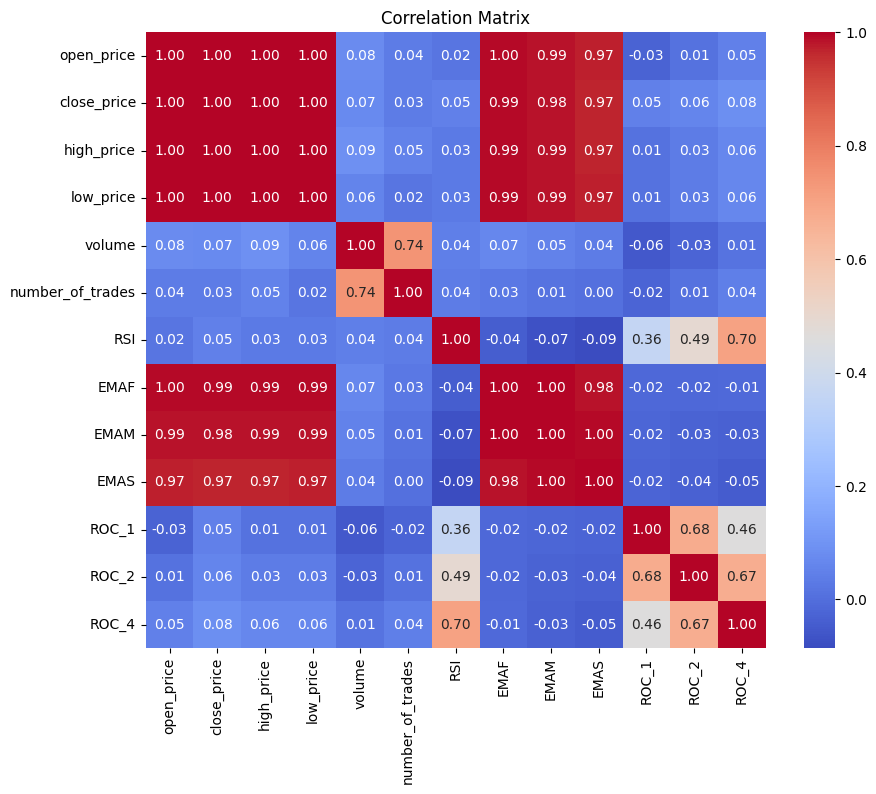

1704


,open_price,close_price,high_price,low_price,volume,number_of_trades,RSI,EMAF,EMAM,EMAS,ROC_1,ROC_2,ROC_4
54615,0.0000116800,0.0000116500,0.0000116800,0.0000116500,20825478629.0000000000,229,37.5000000000,0.0000116696,0.0000116702,0.0000116702,-0.1713796058,-0.2568493151,-0.3421727973
54633,0.0000116600,0.0000116700,0.0000116800,0.0000116500,13882525210.0000000000,200,50.0000000000,0.0000116697,0.0000116702,0.0000116702,0.1716738197,0.0000000000,0.0000000000
54655,0.0000116600,0.0000116600,0.0000116800,0.0000116400,6958686829.0000000000,119,33.3333333333,0.0000116682,0.0000116695,0.0000116698,-0.0856898029,0.0858369099,-0.1712328767
54675,0.0000116500,0.0000116600,0.0000116700,0.0000116400,12558723424.0000000000,214,42.8571428571,0.0000116669,0.0000116688,0.0000116694,0.0000000000,-0.0856898029,-0.0856898029
54743,0.0000116600,0.0000116400,0.0000116600,0.0000116300,7096114397.0000000000,170,25.0000000000,0.0000116628,0.0000116666,0.0000116683,-0.1715265866,-0.1715265866,-0.0858369099


In [13]:
columns_to_drop = [
    'ignore', 'is_kline_closed', 'event_time', 'symbol',
    'kline_start_time', 'kline_close_time', 'interval', 'event_type',
    'quote_assest_volume', 'take_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
    'first_trade_id', 'last_trade_id'
]

df = df.drop(columns=columns_to_drop)

#RSI CALCULATION
def calculate_rsi(data, window=6):
    
    delta = data['close_price'].diff()

    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss

    rsi = 100 - (100 / (1 + rs))

    return rsi

df['RSI'] = calculate_rsi(df)


#EMAs CALCULATION
def calculate_ema(df, span):
    return df['close_price'].ewm(span=span, adjust=False).mean()

df['EMAF'] = calculate_ema(df, span=12)
df['EMAM'] = calculate_ema(df, span=26)
df['EMAS'] = calculate_ema(df, span=50)

#ROC CALCULATION
def calculate_roc(df, n):
    return ((df['close_price'] - df['close_price'].shift(n)) / df['close_price'].shift(n)) * 100


df['ROC_1'] = calculate_roc(df, 1)
df['ROC_2'] = calculate_roc(df, 2)
df['ROC_4'] = calculate_roc(df, 4)


df = df.dropna(subset=['close_price', 'RSI', 'ROC_1', 'ROC_2','ROC_4'])

correlation_matrix = df.corr()

print("Correlation Matrix:")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print(len(df))
df.head()

In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :-1])  
        y.append(data[i + seq_length, -1])     # ROC_1 as target
    return np.array(X), np.array(y)


sequence_length = 10  
n_features = scaled_data.shape[1] - 1  
n_units = 50  


X, y = create_sequences(scaled_data, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], n_features))


split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(n_units, input_shape=(sequence_length, n_features)))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {mse}')

# Predictions
predictions = model.predict(X_test)

Epoch 1/50


c:\Users\HP\Desktop\Projects\tradingbot\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0498 - val_loss: 0.0096
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - val_loss: 0.0085
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - val_loss: 0.0075
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - val_loss: 0.0073
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - val_loss: 0.0052
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - val_loss: 0.0047
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - val_loss: 0.0044
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - val_loss: 0.0041
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0039

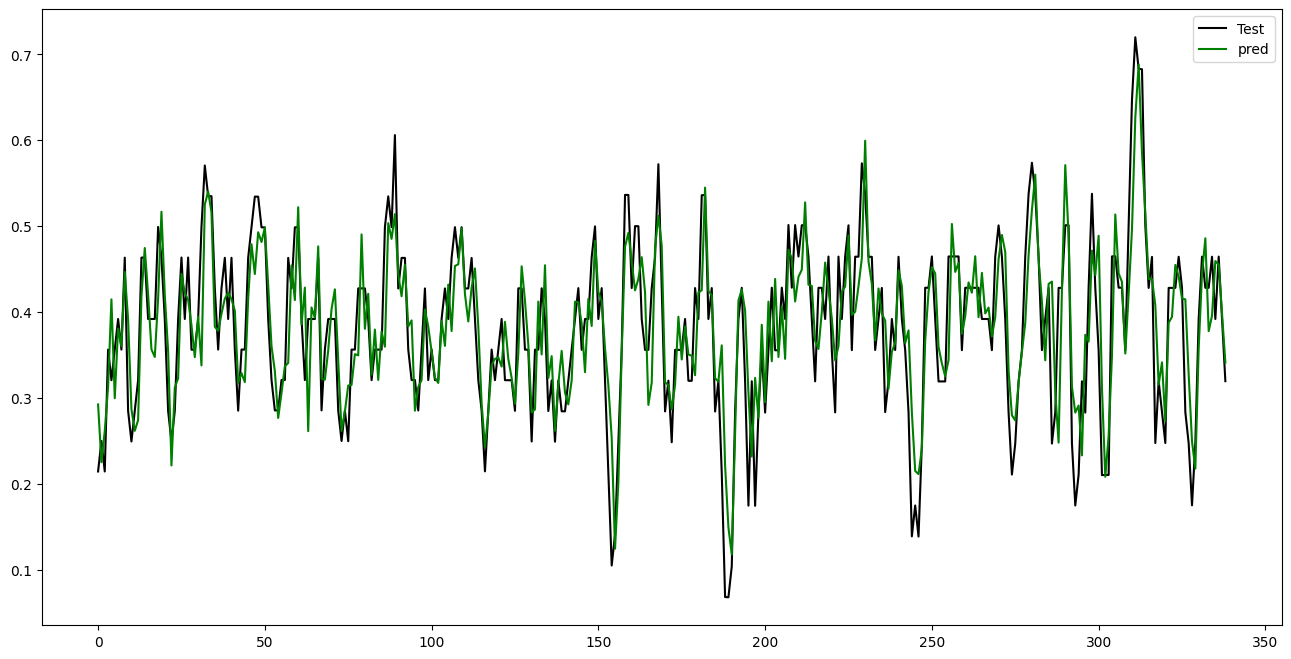

In [15]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(predictions, color = 'green', label = 'pred')
plt.legend()
plt.show()